# AITEX FABRIC IMAGE DATABASE
- https://www.aitex.es/afid/

## Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
% cd ./drive/MyDrive/colab_notebook/image/

/content/drive/MyDrive/colab_notebook/image


## Data set 불러오기

In [4]:
! pip install opencv-python

In [5]:
import cv2
import os
import glob
import shutil
import random
import string
import numpy as np

In [6]:
PATH_DEFECT = 'dataset/Defect_images/'
PATH_MASK = 'dataset/Mask_images/'
PATH_NODEFECT = 'dataset/NODefect_images/'

In [9]:
random.seed(0)

defect_list = glob.glob(PATH_DEFECT + '*.png')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

# Match defect-mask pairs
new_defect_list = list()
new_mask_list = list()
for defect in defect_list:
    num = defect.split('/')[-1].split('_')[0]
    for mask in mask_list:
        num_mask = mask.split('/')[-1].split('_')[0]
        if num == num_mask:
            new_defect_list.append(defect)
            new_mask_list.append(mask)
            break
defect_list = new_defect_list
mask_list = new_mask_list

In [10]:
# # The first dataset given
# if os.path.exists('dataset/1') is False:
#     os.mkdir('dataset/1')
# for file_name in pass_list + defect_list:
#     if random.randint(0, 9) < 2:
#         barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
#         shutil.copy2(file_name, 'dataset/1/' + barcode + '.png')

In [11]:
# # The second dataset
# if os.path.exists('dataset/2') is False:
#     os.mkdir('dataset/2')
# if os.path.exists('dataset/2/OK') is False:
#     os.mkdir('dataset/2/OK')
# if os.path.exists('dataset/2/FAIL') is False:
#     os.mkdir('dataset/2/FAIL')
# idx = 0
# for file_name in pass_list:
#     img = cv2.imread(file_name)
#     height, width, _ = img.shape
#     step = height // 2

#     for i in range(width // step):
#         w = i * step
#         if w < width - height and random.randint(0, 9) < 2:
#             patch = img[:, w:w+height, :]
#             cv2.imwrite('dataset/2/OK/%04d.png' % idx, patch)
#             idx += 1 

# patch_list = list()
# for item in zip(defect_list, mask_list):
#     defect, mask = item

#     img_d = cv2.imread(defect)
#     img_m = cv2.imread(mask)

#     height, width, _ = img_d.shape
#     step = height // 2
#     for i in range(width // step):
#         w = i * step
#         if w < width - height:
#             patch = img_d[:, w:w+height, :]
#             patch_d = img_m[:, w:w+height, :]
#             if patch_d.sum() > 0:
#                 patch_list.append(patch)

# random.shuffle(patch_list)
# patch_list_fraction = patch_list[:len(patch_list)//3]
# for idx, patch in enumerate(patch_list_fraction):
#     cv2.imwrite('dataset/2/FAIL/%04d.png' % idx, patch)

In [12]:
# The third dataset
if os.path.exists('dataset/3') is False:
    os.mkdir('dataset/3')
if os.path.exists('dataset/3/OK') is False:
    os.mkdir('dataset/3/OK')
if os.path.exists('dataset/3/FAIL') is False:
    os.mkdir('dataset/3/FAIL')
if os.path.exists('dataset/3/MASK') is False:
    os.mkdir('dataset/3/MASK')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 3:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/3/OK/%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('dataset/3/FAIL/%04d.png' % idx, patch)
    cv2.imwrite('dataset/3/MASK/%04d.png' % idx, patch_d)

In [41]:
# The test dataset
if os.path.exists('data/') is False:
    os.mkdir('data/')
if os.path.exists('tfrecords/') is False:
    os.mkdir('tfrecords/')
if os.path.exists('model/') is False:
    os.mkdir('model/')
if os.path.exists('data/input_data') is False:
    os.mkdir('data/input_data')
if os.path.exists('data/output_csv') is False:
    os.mkdir('data/output_csv')
    
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 5:
            patch = img[:, w:w+height, :]
            cv2.imwrite('data/input_data/ok_%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('data/input_data/fail_%04d.png' % idx, patch)

## Data Preprocessing
* TFRecord Builder

In [13]:
import glob
import os
import tensorflow as tf
import cv2

Paths and Hyperparameters

In [14]:
DATASET_OK_PATTERN = 'dataset/3/OK/*.png'
DATASET_FAIL_PATTERN = 'dataset/3/FAIL/*.png'

# to serialize the data into binary
TFRECORD_PATH = 'tfrecords/'
IMAGE_PER_TFRECORD = 100

Import data

In [15]:
ok_list = glob.glob(DATASET_OK_PATTERN)
fail_list = glob.glob(DATASET_FAIL_PATTERN)

num_ok = len(ok_list)
num_fail = len(fail_list)

# Oversampling
# to make the number of fail datas equal to number of ok datas
fail_list_new = list()
for _ in range(num_ok // num_fail):
    fail_list_new += fail_list
fail_list_new += fail_list[:num_ok % num_fail]
fail_list = fail_list_new

ok_label = [0] * len(ok_list)
fail_label = [1] * len(fail_list)

file_list = ok_list + fail_list
label_list = ok_label + fail_label

TFRecord functions

In [16]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
    image_shape = tf.image.decode_image(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

Write TFRecords

In [17]:
if os.path.exists(TFRECORD_PATH) is False:
    os.mkdir(TFRECORD_PATH)
    
num_tfrecords = len(file_list) // IMAGE_PER_TFRECORD
if len(file_list) % IMAGE_PER_TFRECORD != 0:
    num_tfrecords += 1
    
for idx in range(num_tfrecords):
    idx0 = idx * IMAGE_PER_TFRECORD
    idx1 = idx0 + IMAGE_PER_TFRECORD
    record_file = TFRECORD_PATH + '%05d.tfrecords' % idx
    with tf.io.TFRecordWriter(record_file) as writer:
        for filename, label in zip(file_list[idx0:idx1],
                                  label_list[idx0:idx1]):
            image_string = open(filename, 'rb').read()
            tf_example = image_example(image_string, label)
            writer.write(tf_example.SerializeToString())

## Model learning

In [18]:
! pip install tensorflow_addons

     |████████████████████████████████| 686kB 8.3MB/s 


In [19]:
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Concatenate, Flatten, Dense

Hyper parameter

In [20]:
EPOCHS = 1000
RESULT_SAVE_PATH = 'results/'

### function define

Inception-based model function

In [21]:
def Model():
    def inception(filters):
        def subnetwork(x):
            h1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
            h1 = MaxPool2D()(h1)
            
            h2 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(h2)
            h2 = MaxPool2D()(h2)
            
            h3 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(h3)
            h3 = MaxPool2D()(h3)
            return Concatenate()([h1, h2, h3])
        return subnetwork
    
    x = tf.keras.Input(shape=(256, 256, 3))
    h = inception(16)(x)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = Flatten()(h)
    h = Dense(1024, activation='relu')(h)
    y = Dense(1, activation='sigmoid')(h)
    return tf.keras.Model(inputs=x, outputs=y)

Data preprocessing function

In [22]:
def preprocess(img):
    return tf.image.convert_image_dtype(img, tf.float32)

Data Augmentation function

In [23]:
# do filp, rotate, translation
def augmentation(img, label):
    def flip(x):
        x = tf.image.random_flip_left_right(x)
        x = tf.image.random_flip_up_down(x)
        return x
    
    def rotate(x):
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                   lambda: tfa.image.rotate(x,
                                       tf.random.uniform(shape=[], minval=0.0, maxval=360.0, dtype=tf.float32),
                                       interpolation='BILINEAR'),
                   lambda: x)
        return x
    
    def translation(x):
        dx = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        dy = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                    lambda: tfa.image.transform(x,
                                                [0, 0, dx, 0, 0, dy, 0, 0],
                                                interpolation='BILINEAR'),
                    lambda: x)
        return x
    
    img = flip(img)
    img = rotate(img)
    img = translation(img)
           
    return img, label

Load TFRecords

In [24]:
tffiles = glob.glob('tfrecords/*')
raw_image_dataset = tf.data.TFRecordDataset(tffiles)

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def _parse_image_label(parsed_dataset):
    return preprocess(tf.image.decode_png(parsed_dataset['image_raw'])), parsed_dataset['label']

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
dataset = parsed_image_dataset.map(_parse_image_label)

Train and Validation set

In [25]:
ds_size = 0
for _ in dataset:
    ds_size += 1

train_size = int(ds_size * 0.7)

ds = dataset.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).prefetch(1024).batch(32).map(augmentation)
ds_valid = ds.skip(train_size).prefetch(1024).batch(32)

Build a model and start learning

In [35]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=EPOCHS,
                    callbacks=[earlystopping])

Epoch 1/1000
55/55 [==============================] - 29s 424ms/step - loss: 0.7105 - accuracy: 0.4937 - val_loss: 0.6871 - val_accuracy: 0.4960
Epoch 2/1000
55/55 [==============================] - 28s 428ms/step - loss: 0.6921 - accuracy: 0.4983 - val_loss: 0.6757 - val_accuracy: 0.6532
Epoch 3/1000
55/55 [==============================] - 26s 410ms/step - loss: 0.6810 - accuracy: 0.5403 - val_loss: 0.6671 - val_accuracy: 0.6559
Epoch 4/1000
55/55 [==============================] - 27s 414ms/step - loss: 0.6821 - accuracy: 0.5518 - val_loss: 0.6432 - val_accuracy: 0.6492
Epoch 5/1000
55/55 [==============================] - 26s 409ms/step - loss: 0.6644 - accuracy: 0.5570 - val_loss: 0.6189 - val_accuracy: 0.6022
Epoch 6/1000
55/55 [==============================] - 27s 424ms/step - loss: 0.6587 - accuracy: 0.5818 - val_loss: 0.6048 - val_accuracy: 0.7097
Epoch 7/1000
55/55 [==============================] - 28s 435ms/step - loss: 0.6609 - accuracy: 0.5599 - val_loss: 0.6130 - val_ac

## Plotting

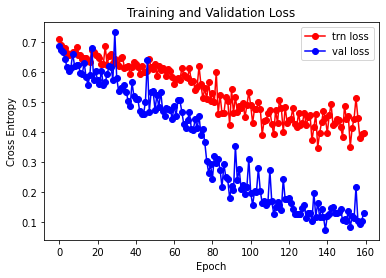

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(loss, 'ro-', label='trn loss')
plt.plot(val_loss, 'bo-' , label='val loss')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Save Model

In [29]:
! pip install -q pyyaml h5py

In [38]:
MODEL_PATH = 'model/'

In [39]:
if os.path.exists(MODEL_PATH) is False:
    os.mkdir(MODEL_PATH)

model.save('model/inception_model.h5')

## Build Testing program

In [40]:
from datetime import datetime
import time

Hyper parameters

In [42]:
THRES_LEVEL = 0.5

INPUT_PATH = 'data/input_data/'
CSV_PATH = 'data/output_csv/'

In [43]:
# load saved model
model = tf.keras.models.load_model('model/inception_model.h5')

Preprocessing function

In [44]:
def preprocess(file_name):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_image(img)
    return tf.image.convert_image_dtype(img, tf.float32)

Input Data

In [45]:
file_list = glob.glob(INPUT_PATH + '*.png')
dataset = tf.data.Dataset.list_files(file_list).map(preprocess)

Run code and save the result to csv

In [46]:
now = datetime.now().strftime('%Y%d%m_%H%M%S')
with open(CSV_PATH + now + '.csv', 'w') as f:
    for image, filename in zip(dataset, file_list):
        image = image[tf.newaxis, ...] # HWC -> NHWC
        
        a = time.time()
        predict = model.predict(image)[0][0]
        # to check if it is real-time
        print('Inference Time:', time.time() - a)
        
        if predict > THRES_LEVEL:
            label = 'FAIL'
        else:
            label = 'OK'
        
        f.write(','.join([filename, label, str(predict)]) + '\n')

Inference Time: 0.6581251621246338
Inference Time: 0.03796648979187012
Inference Time: 0.03969597816467285
Inference Time: 0.03570365905761719
Inference Time: 0.03858351707458496
Inference Time: 0.03538393974304199
Inference Time: 0.0426485538482666
Inference Time: 0.04348039627075195
Inference Time: 0.036834716796875
Inference Time: 0.036561012268066406
Inference Time: 0.041187286376953125
Inference Time: 0.05600261688232422
Inference Time: 0.037711381912231445
Inference Time: 0.03550267219543457
Inference Time: 0.035523414611816406
Inference Time: 0.038454294204711914
Inference Time: 0.03642892837524414
Inference Time: 0.03725886344909668
Inference Time: 0.04148459434509277
Inference Time: 0.043546199798583984
Inference Time: 0.044458866119384766
Inference Time: 0.03905320167541504
Inference Time: 0.0407867431640625
Inference Time: 0.03691530227661133
Inference Time: 0.037203073501586914
Inference Time: 0.03675341606140137
Inference Time: 0.04330611228942871
Inference Time: 0.0459728